In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import MultiTaskLassoCV
from sklearn.linear_model import Ridge
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from pandas import DataFrame
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score

In [4]:
df = pd.read_csv('..\Initial_data\K5T4\K5T4_cor.csv', ";")
df

C:\Users\User\AppData\Local\Temp\ipykernel_9232\2155315445.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df = pd.read_csv('..\Initial_data\K5T4\K5T4_cor.csv', ";")


,K5PC5CH.OP,K5PCV5I.PV,K5T4.PV,K5P21.PV,K5T18_2.PV,K5T7.PV,K5P19_2.PV,K5P19_1.PV,K5PC6CH.OP,K5HCV63I.PV,...,K5P18_2.PV,K5P23.PV,K5P24.PV,K5P20.PV,K5T5_1.PV,K5T5_2.PV,K5T18_1.PV,K5T8_4.PV,K5T8_5.PV,K5T8_6.PV
0,28.43256,96.80196,107.4449,-274.5025,76.77946,41.84182,-274.6382,-322.5910,41.48160,97.29976,...,-70.41599,0.554497,0.623450,-831.0353,567.9844,657.2806,203.5855,93.15239,97.01862,140.6675
1,37.02330,96.78888,116.0183,-355.9825,81.91438,41.49650,-253.3734,-306.2327,49.20881,97.32501,...,-75.83286,0.803466,0.894443,-793.8561,587.1810,694.4102,219.8285,97.42670,102.68660,148.8049
2,40.27494,96.86331,120.4990,-383.8112,84.44536,42.03291,-247.2132,-301.2046,52.11905,97.40008,...,-77.27142,0.891745,0.993353,-781.3564,591.4104,705.2923,227.0702,100.82560,106.75240,155.0162
3,33.39332,96.85043,111.9130,-314.1233,79.10992,40.66955,-264.0493,-313.9809,45.67082,97.36178,...,-73.86970,0.676204,0.758241,-812.5995,579.0649,677.1272,213.1518,95.36046,99.94947,145.7436
4,31.39035,96.77234,109.0870,-302.5283,78.44747,37.86535,-265.3562,-314.7856,44.23922,96.98950,...,-73.61724,0.645111,0.715498,-818.5420,574.5350,669.7603,211.3369,92.83288,97.44041,143.6423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,33.25313,96.28430,117.2377,-306.5566,80.47744,44.77445,-265.8409,-314.6771,45.77393,96.94262,...,-72.98355,0.678377,0.764011,-813.6609,578.9767,678.8871,217.1490,99.48669,103.83820,149.5026
125,32.90705,96.27695,117.2050,-302.6340,80.10125,45.29783,-267.7749,-316.0378,45.42057,97.09579,...,-72.32182,0.666750,0.753789,-815.4399,576.3058,674.6070,217.0010,99.87650,104.13790,149.6594
126,31.83300,96.27595,114.7550,-296.5641,76.20879,43.63995,-268.8632,-316.9579,44.49977,96.86402,...,-71.86654,0.644950,0.729902,-818.3569,572.5627,667.1817,214.9969,98.01228,102.26290,147.6954
127,30.21828,96.23937,112.3144,-287.9799,71.99249,42.38327,-269.9579,-318.3916,43.29536,96.46970,...,-71.22888,0.618028,0.697992,-822.6872,570.9168,664.0824,212.6010,96.11859,100.42390,145.8230


<AxesSubplot:>

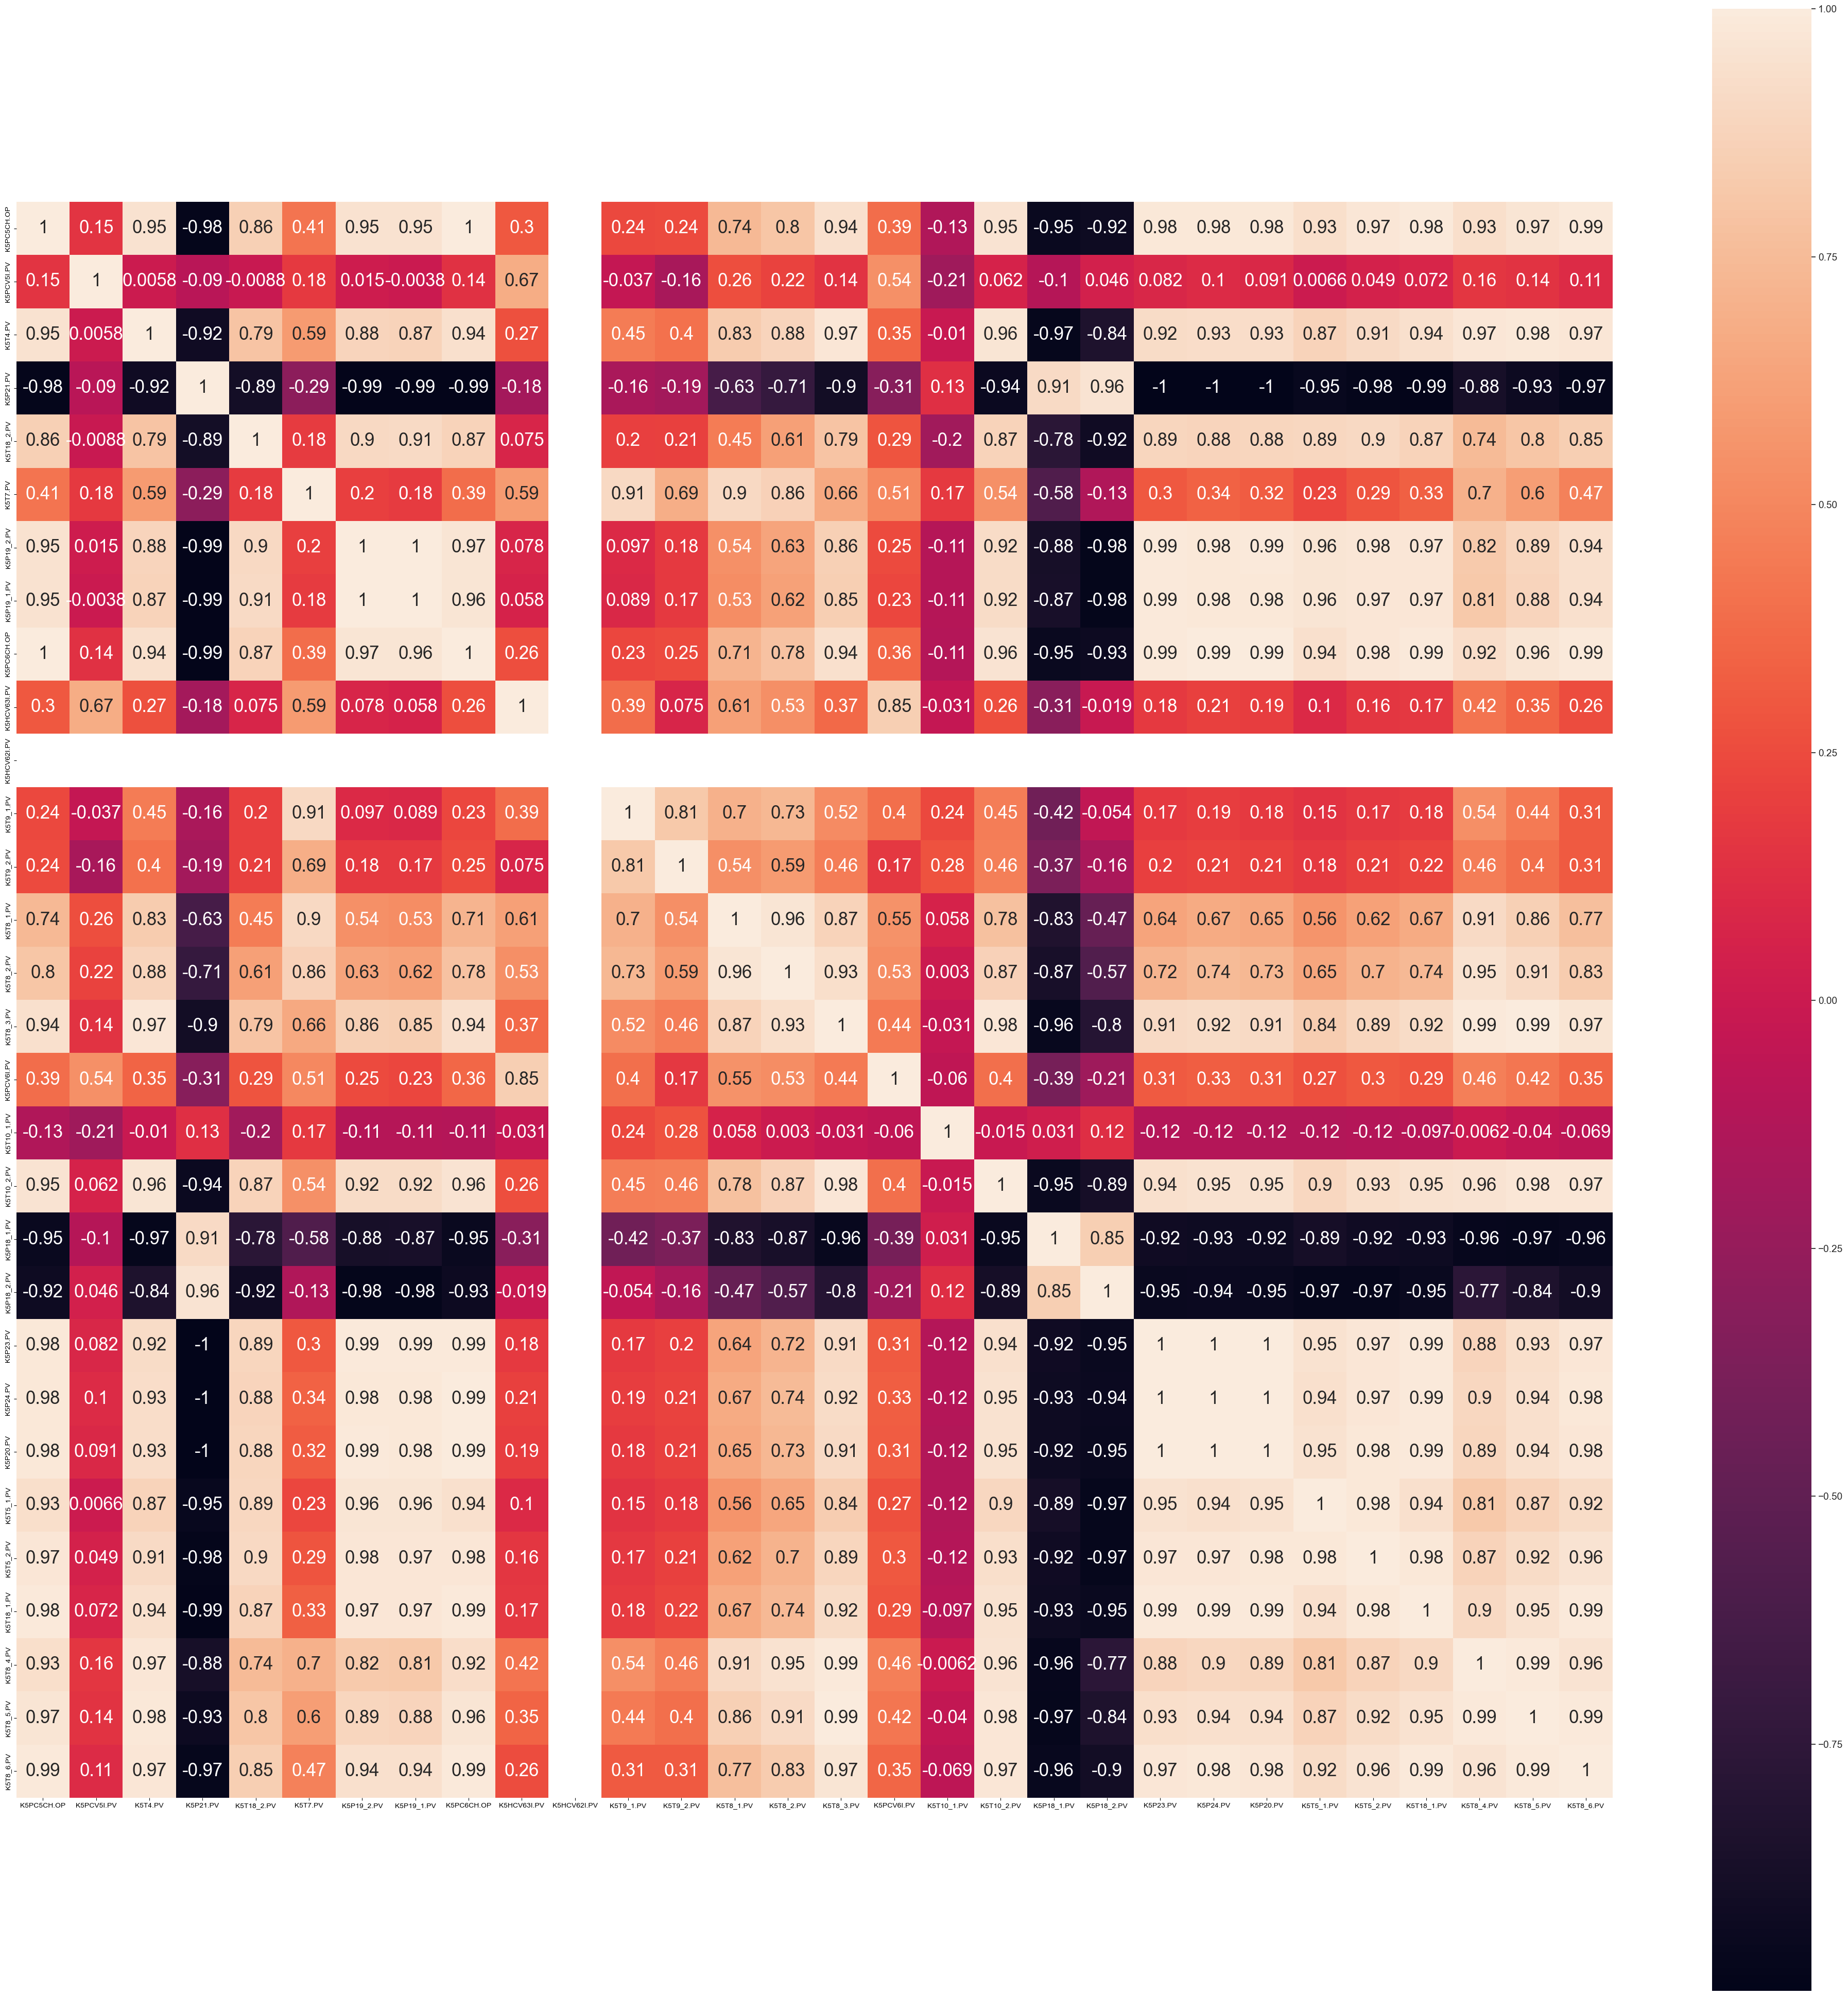

In [5]:
corrmat = df.corr()
fig,ax = plt.subplots(figsize=(50,50))
sns.set(font_scale=1.25)
sns.heatmap(corrmat, annot=True, annot_kws={'size':25}, square=True)

In [6]:
df = pd.read_csv('..\Initial_data\K5T4\K5T4.csv', ";")
df

C:\Users\User\AppData\Local\Temp\ipykernel_9232\313295036.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df = pd.read_csv('..\Initial_data\K5T4\K5T4.csv', ";")


,K5PC5CH.OP,K5PCV5I.PV,K5T4.PV,K5T18_2.PV,K5PC6CH.OP,K5T9_2.PV,K5PCV6I.PV,K5T10_1.PV,K5T10_2.PV
0,28.43256,96.80196,107.4449,76.77946,41.48160,24.07831,95.68557,59.77333,90.33453
1,37.02330,96.78888,116.0183,81.91438,49.20881,22.97996,95.67174,71.05275,94.62981
2,40.27494,96.86331,120.4990,84.44536,52.11905,21.95745,95.70911,72.43599,97.20560
3,33.39332,96.85043,111.9130,79.10992,45.67082,21.60457,95.63900,68.05637,91.99626
4,31.39035,96.77234,109.0870,78.44747,44.23922,19.60295,95.39429,64.59758,90.22770
...,...,...,...,...,...,...,...,...,...
124,33.25313,96.28430,117.2377,80.47744,45.77393,24.58385,95.26511,92.96518,94.62846
125,32.90705,96.27695,117.2050,80.10125,45.42057,24.84278,95.38406,93.61079,94.61106
126,31.83300,96.27595,114.7550,76.20879,44.49977,23.64379,95.35741,91.39860,92.59914
127,30.21828,96.23937,112.3144,71.99249,43.29536,23.21000,95.12940,84.64066,91.07623


In [7]:
df=df.dropna()
df=df.round(3)
df

,K5PC5CH.OP,K5PCV5I.PV,K5T4.PV,K5T18_2.PV,K5PC6CH.OP,K5T9_2.PV,K5PCV6I.PV,K5T10_1.PV,K5T10_2.PV
0,28.433,96.802,107.445,76.779,41.482,24.078,95.686,59.773,90.335
1,37.023,96.789,116.018,81.914,49.209,22.980,95.672,71.053,94.630
2,40.275,96.863,120.499,84.445,52.119,21.957,95.709,72.436,97.206
3,33.393,96.850,111.913,79.110,45.671,21.605,95.639,68.056,91.996
4,31.390,96.772,109.087,78.447,44.239,19.603,95.394,64.598,90.228
...,...,...,...,...,...,...,...,...,...
124,33.253,96.284,117.238,80.477,45.774,24.584,95.265,92.965,94.628
125,32.907,96.277,117.205,80.101,45.421,24.843,95.384,93.611,94.611
126,31.833,96.276,114.755,76.209,44.500,23.644,95.357,91.399,92.599
127,30.218,96.239,112.314,71.992,43.295,23.210,95.129,84.641,91.076


In [14]:
y = df.drop(['K5PC5CH.OP', 'K5PCV5I.PV', 'K5T18_2.PV', "K5PC6CH.OP", "K5T9_2.PV", "K5PCV6I.PV", "K5T10_1.PV", "K5T10_2.PV"], axis=1)
x = df.drop(['K5T4.PV'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 25)


In [17]:
lasso = MultiTaskLassoCV(cv=5, random_state=10).fit(X_train, y_train)
lasso.score(X_train, y_train)
clf = Ridge(alpha=0.5)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9483884322495313

In [18]:
import pickle
filename = '../model/K5T4.sav'
pickle.dump(clf, open(filename, 'wb'))

In [19]:
loaded_model = pickle.load(open("../model/K5T4.sav", 'rb'))

In [20]:
task2 = {'K5PC5CH.OP':[30.023],
        'K5PCV5I.PV':[96.264],
        'K5T18_2.PV':[73.748],
        'K5PC6CH.OP':[42.981],
        'K5T9_2.PV':[23.610],
        'K5PCV6I.PV':[95.271],
        'K5T10_1.PV':[72.311],
        'K5T10_2.PV':[90.750]}
df2 = pd.DataFrame(data=task2)
df2

,K5PC5CH.OP,K5PCV5I.PV,K5T18_2.PV,K5PC6CH.OP,K5T9_2.PV,K5PCV6I.PV,K5T10_1.PV,K5T10_2.PV
0,30.023,96.264,73.748,42.981,23.61,95.271,72.311,90.75


In [21]:
loaded_model.predict(df2)

array([[112.19598948]])